**PROJECT DESCRIPTION**

I work forE-shop pro, a leading e-commerce platform  established in 2010. Garnering a massive influx of customers but challenged with customer retention. 

I need to identify patterns in customer behavior and churn rate and separate them into differnt cohorts. This will allow me spot potential churn customers and create strategies for retention.

I am going to do this with access to data going back to 2010. The dataset contains InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerId and Country.


**IMPORT LIBRARIES**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

**Load Data**


In [7]:
data = pd.read_csv('Dataset_ecommerce.csv')

In [8]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [9]:
##descriptive stat
data.describe(include = 'all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [10]:
## check for missing values 
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [11]:
##drop missing value 
data.dropna(inplace = True)

In [12]:
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [13]:
## check for more information 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [14]:
## convert invoice date to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

**Exploratory Data Analysis**


analysis by country


In [15]:
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [16]:
quantity_by_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


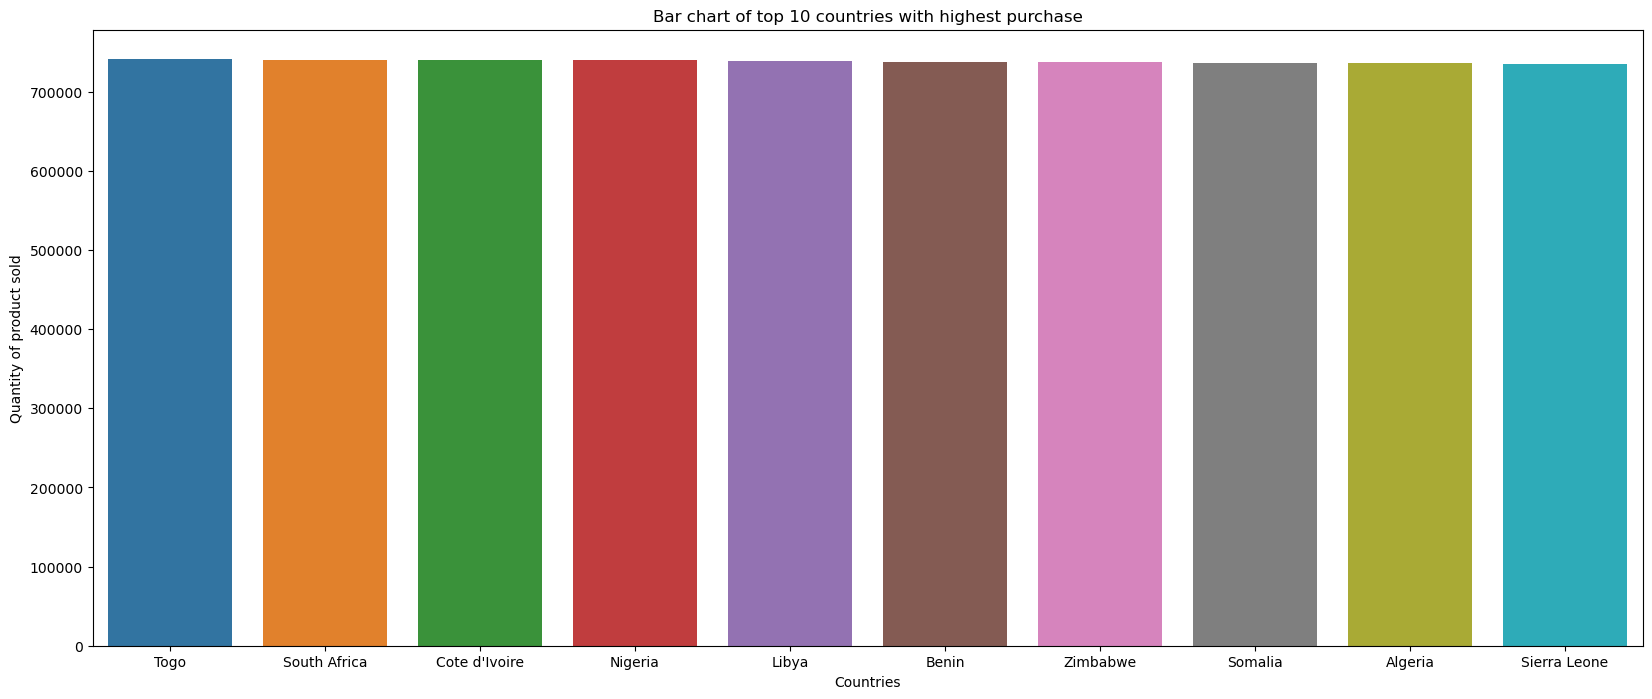

In [17]:
##visualize top 10 countries with most product sold
top_10_country = quantity_by_country.head(10) 

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of product sold")
plt.title("Bar chart of top 10 countries with highest purchase")
plt.show()

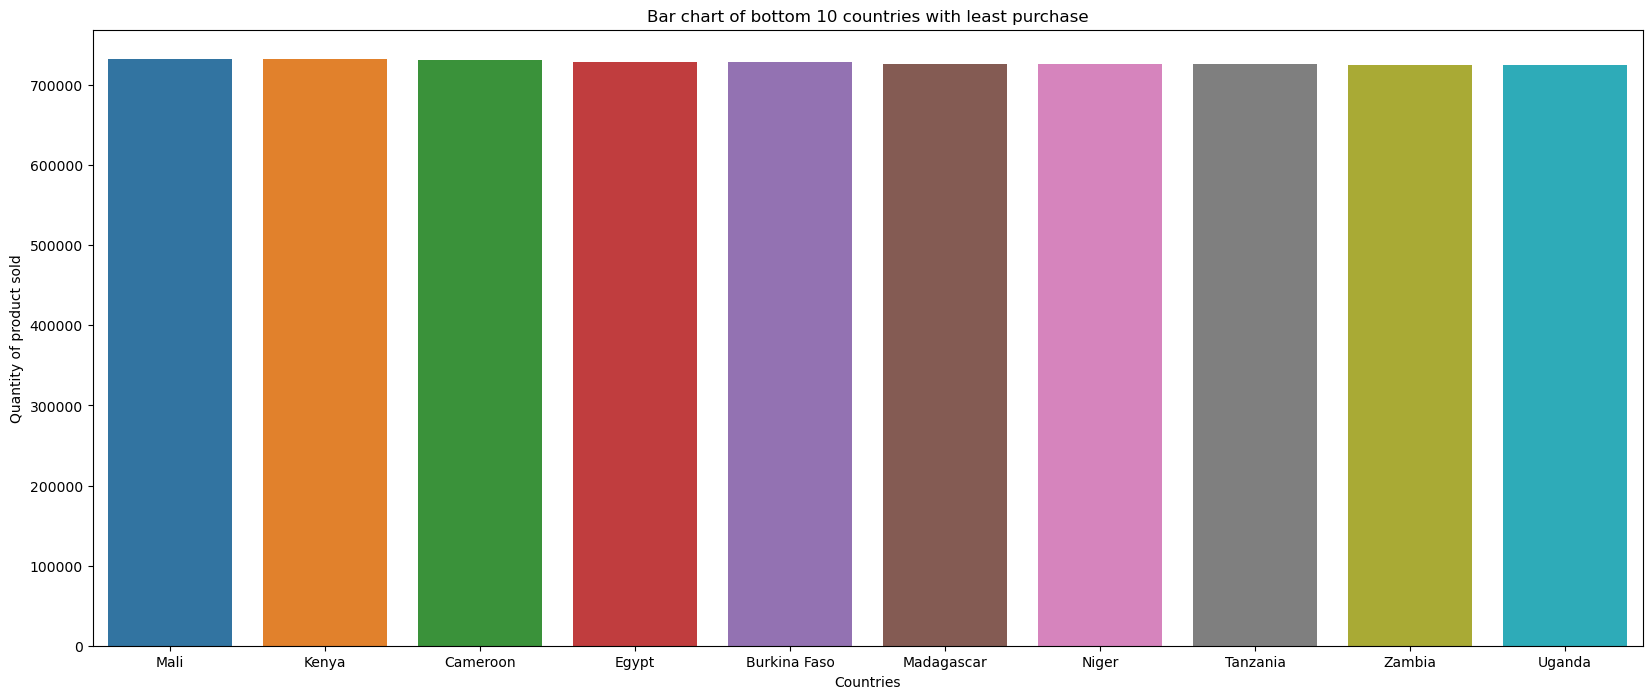

In [18]:
##visualize last 10 countries where least product sold
bottom_10_country = quantity_by_country.tail(10)
plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = bottom_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of product sold")
plt.title("Bar chart of bottom 10 countries with least purchase")
plt.show()

**Analysis of countries and number of customers**

In [19]:
country_to_customer = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customer = country_to_customer.sort_values("CustomerID",ascending = False).reset_index()

In [20]:
country_to_customer.head()

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049


<function matplotlib.pyplot.show(close=None, block=None)>

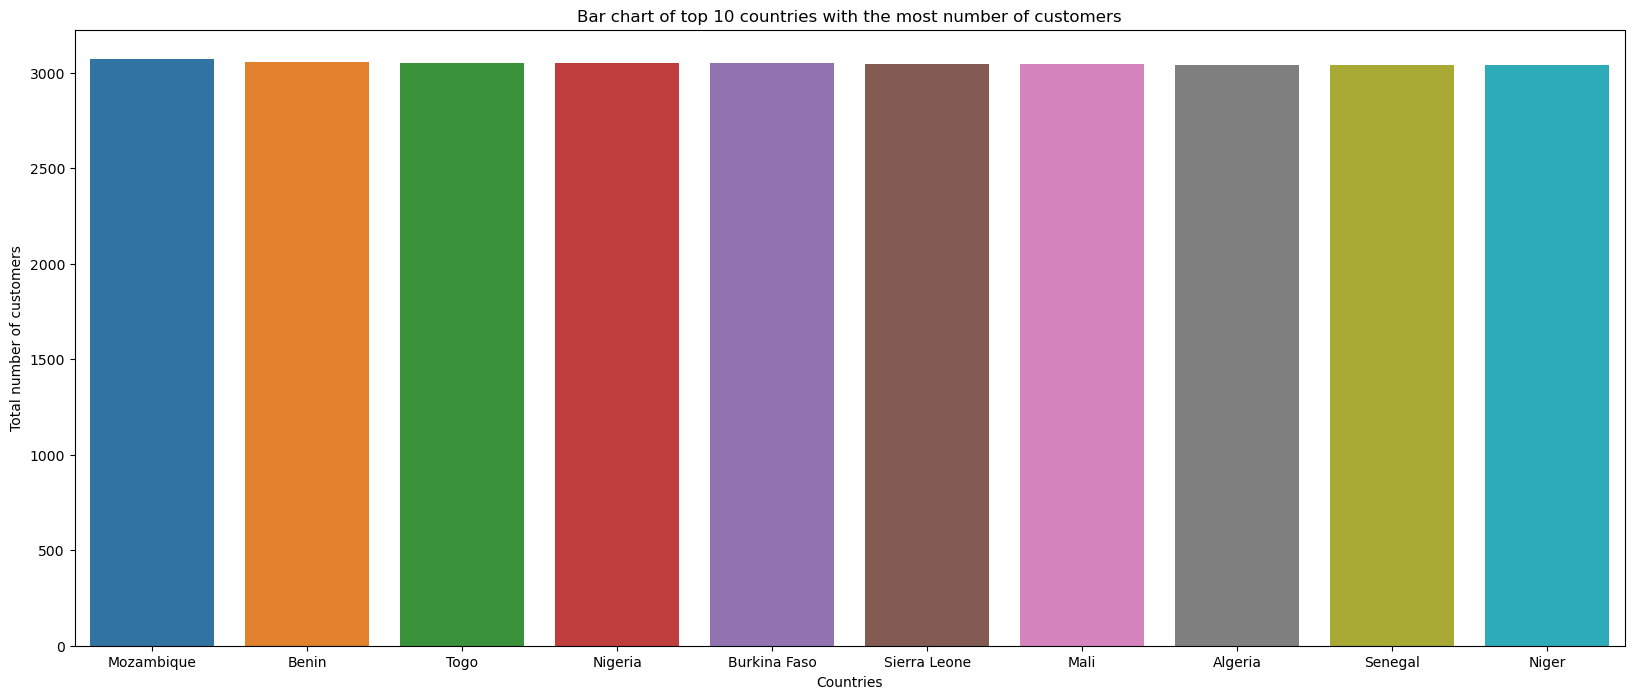

In [21]:
#top 10 country  by number of customers
top_countries_to_customers = country_to_customer.head(10)

plt.figure(figsize = (20,8))
sns.barplot(x = "Country", y = "CustomerID", data = top_countries_to_customers)

plt.xlabel("Countries")
plt.ylabel("Total number of customers")
plt.title("Bar chart of top 10 countries with the most number of customers")
plt.show


**Sales trend visualization**

In [22]:
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period('M'))["Quantity"].sum()


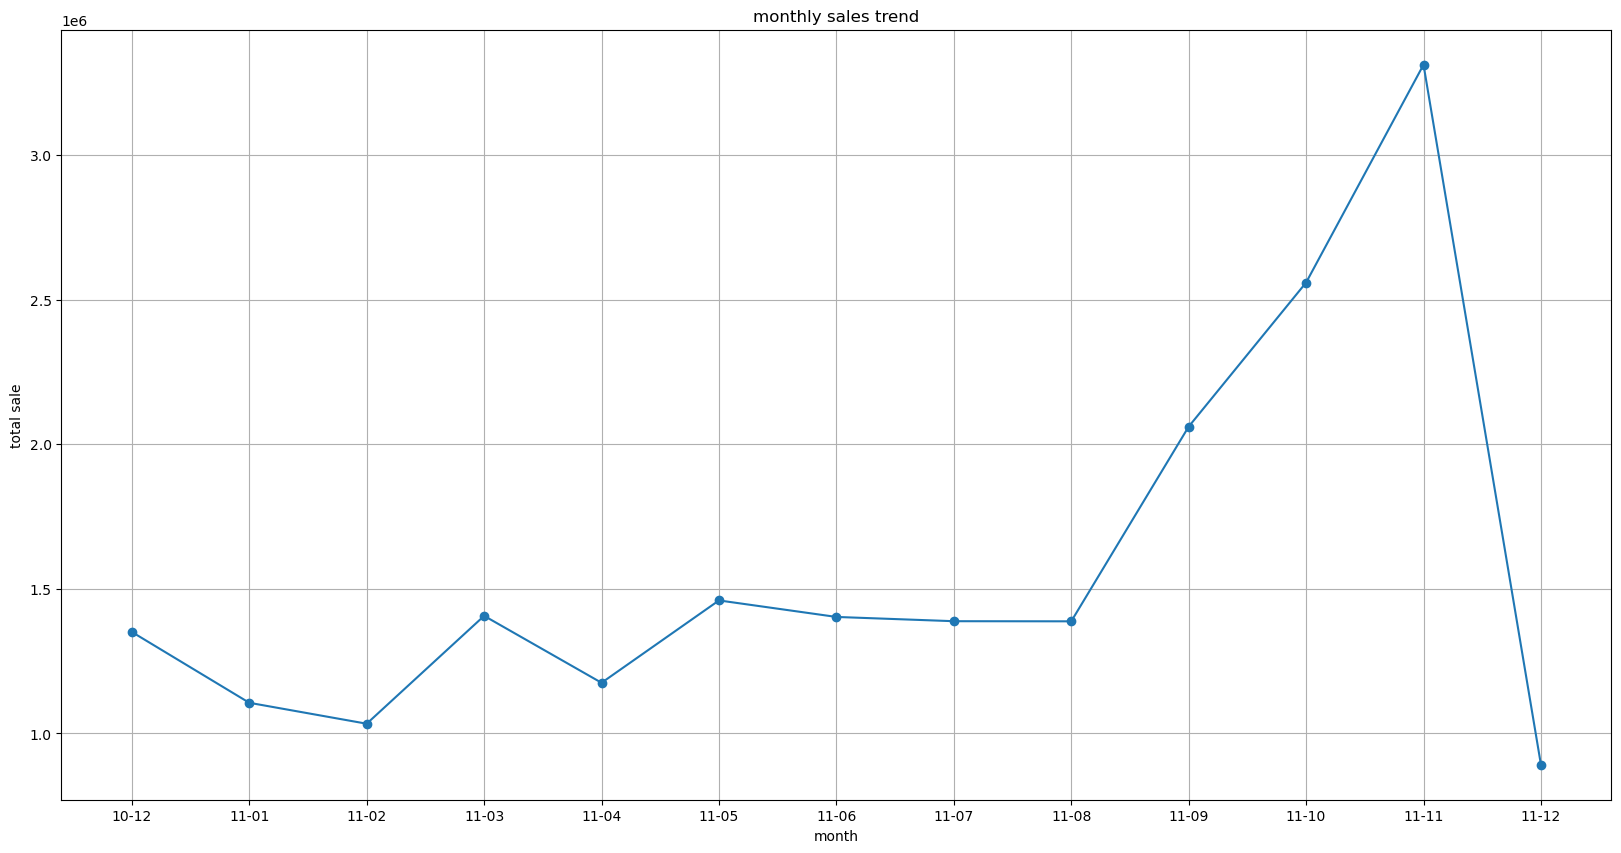

In [23]:
#create a line plot 
plt.figure(figsize = (20,10))
plt.plot(monthly_sales.index.strftime("%y-%m"),monthly_sales.values, marker = 'o', linestyle = '-')
plt.xlabel("month")
plt.ylabel("total sale")
plt.title("monthly sales trend")
plt.grid(True)
plt.show()

**Cohort Analysis**

In [24]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [25]:
#create a function to return just year and month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [26]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [27]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [ ]:
#create a cohort date(first day every unique customer made a purchase)

def get_cohort_date(data):
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["cohort date"]

In [ ]:
data["cohort date"] = get_cohort_date(data)

In [ ]:
data

**Cohort Index**

In [ ]:
#creating cohort index (numerical index of the difference from first purchase to the last purchase)

def get_year_and_month(data, col):
    
    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [ ]:
first_month, first_year = get_year_and_month(data, "cohort date")

In [ ]:
first_month

In [ ]:
first_year

In [ ]:
latest_month, latest_year = get_year_and_month(data, "InvoiceDate")

In [ ]:
latest_month

In [ ]:
latest_year

In [ ]:
#creating index

def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1
    return index

In [ ]:
data["cohort_index"] = create_cohort_index